Data Source: https://github.com/CSSEGISandData/COVID-19 (John Hopkins dataset)

In [15]:
import pandas as pd
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df = pd.read_csv(url, error_bad_lines=False)
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,872,876,880,898,916,933,946,948,949,964
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,755,758,760,761,761,761,761,761,761,762
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,45,45,45,48,48,48,48,50,52,52


Some countries' data is broken down into provinces in the source data. Canada, as an example is shown below.

In [19]:
df[df['Country/Region']=='Canada']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20
35,Alberta,Canada,53.9333,-116.5765,0,0,0,0,0,0,...,6300,6345,6407,6457,6515,6587,6644,6683,6716,6735
36,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,2353,2360,2376,2392,2407,2428,2428,2444,2446,2467
37,Grand Princess,Canada,37.6489,-122.6655,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
38,Manitoba,Canada,53.7609,-98.8139,0,0,0,0,0,0,...,289,290,290,289,289,289,289,290,290,290
39,New Brunswick,Canada,46.5653,-66.4619,0,0,0,0,0,0,...,120,120,120,120,120,120,120,120,120,120
40,Newfoundland and Labrador,Canada,53.1355,-57.6604,0,0,0,0,0,0,...,261,261,261,261,260,260,260,260,260,260
41,Nova Scotia,Canada,44.6820,-63.7443,0,0,0,0,0,0,...,1019,1020,1024,1026,1034,1037,1040,1043,1044,1045
42,Ontario,Canada,51.2538,-85.3232,0,0,0,0,1,1,...,21817,22158,22516,22865,23258,23645,23974,24286,24755,25197
43,Prince Edward Island,Canada,46.5107,-63.4168,0,0,0,0,0,0,...,27,27,27,27,27,27,27,27,27,27
44,Quebec,Canada,52.9399,-73.5491,0,0,0,0,0,0,...,38480,39235,39940,40732,41429,42192,42928,43636,44206,44784


Drop non-useful columns

In [20]:
df.drop(['Province/State','Lat','Long'],axis=1,inplace=True)

Aggregate numbers for the various provinces in the same country.

In [21]:
vc = df['Country/Region'].value_counts() 

In [22]:
multi_prov_countries = vc[vc > 1].index

In [23]:
agg_df = pd.DataFrame()

Selecting the records of the countries to be aggregated from source df

In [24]:
agg_country_df = df[df['Country/Region'].isin(multi_prov_countries)]

Aggeragated countries data and put the aggregated data into agg_df

In [25]:
for country in multi_prov_countries:
    temp_df = agg_country_df[agg_country_df['Country/Region']== country]
    temp = temp_df.sum(axis=0)
    temp['Country/Region'] = country
    agg_df = agg_df.append(temp,ignore_index = True)

agg_df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/2/20,5/20/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,Country/Region
0,548.0,643.0,920.0,1406.0,2075.0,2877.0,5509.0,6087.0,8141.0,9802.0,...,83959.0,84063.0,83964.0,83966.0,83968.0,83970.0,83975.0,83976.0,83990.0,China
1,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,4.0,...,57926.0,81575.0,60504.0,61957.0,63215.0,64694.0,66201.0,67674.0,68918.0,Canada
2,0.0,0.0,2.0,3.0,3.0,3.0,4.0,5.0,5.0,5.0,...,168518.0,181700.0,168925.0,169583.0,170687.0,174224.0,174918.0,176202.0,176782.0,France
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,183500.0,249619.0,187842.0,191832.0,196243.0,202359.0,207977.0,212629.0,216525.0,United Kingdom
4,0.0,0.0,0.0,0.0,4.0,5.0,5.0,6.0,9.0,9.0,...,6799.0,7081.0,6822.0,6847.0,6875.0,6894.0,6913.0,6918.0,6939.0,Australia
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40434.0,44647.0,40769.0,40968.0,41286.0,41518.0,41973.0,42292.0,42581.0,Netherlands
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9605.0,11315.0,9721.0,9868.0,10019.0,10136.0,10281.0,10416.0,10517.0,Denmark


Dropping the Countries to be aggregated records from original df

In [26]:
for country in multi_prov_countries:
    df.drop(df[df['Country/Region'] == country].index,inplace=True)
df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145
1,Albania,0,0,0,0,0,0,0,0,0,...,872,876,880,898,916,933,946,948,949,964
2,Algeria,0,0,0,0,0,0,0,0,0,...,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542
3,Andorra,0,0,0,0,0,0,0,0,0,...,755,758,760,761,761,761,761,761,761,762
4,Angola,0,0,0,0,0,0,0,0,0,...,45,45,45,48,48,48,48,50,52,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Sao Tome and Principe,0,0,0,0,0,0,0,0,0,...,208,208,220,235,235,235,235,246,251,251
262,Yemen,0,0,0,0,0,0,0,0,0,...,56,65,70,85,106,122,128,130,167,184
263,Comoros,0,0,0,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,34
264,Tajikistan,0,0,0,0,0,0,0,0,0,...,661,729,801,907,1118,1322,1524,1729,1936,2140


Merging  original df and agg_df and perform some preprocessing

In [27]:
cols = agg_df.columns.tolist()
cols = cols[-1:] + cols[:-1]

agg_df = agg_df[cols]

df = pd.concat([df, agg_df], axis=0,sort=False)

df.set_index('Country/Region',inplace=True)

df = df.T

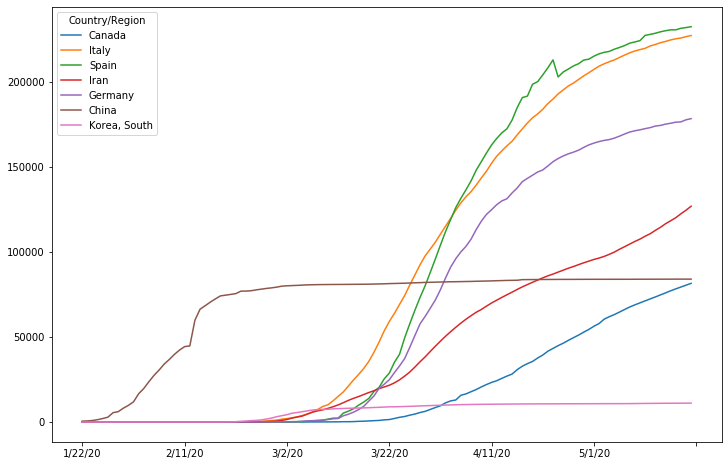

In [29]:
countries_to_be_plotted = ['Canada','Italy','Spain','Iran','Germany','China','Korea, South']
df[countries_to_be_plotted].plot(figsize=(12,8));

Generating time series graph using bar race chart

In [13]:
from IPython.display import HTML
import bar_chart_race as bcr

html = bcr.bar_chart_race(df.iloc[30:,:],label_bars=True,
    use_index=True,filename=None,
    steps_per_period=10,
    period_length=500,
    cmap='dark24',bar_label_size=7,
    tick_label_size=7,
    period_label_size=16,
    fig=None,
    figsize= (5.5, 3.5),n_bars=12, title='COVID-19 Confirmed cases by Country')

C:\Users\Solomon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Solomon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Solomon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Solomon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Solomon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Solomon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 132 missing from c

In [14]:
HTML(html)